Notebook zu Python: Plots: Verwendung von Schleifen und Funktionen

Version 1.1, 30. Mai 2022, Informatik, EAH Jena

(c) Christina B. Class


In diesem Notebook verwenden wir `numpy` und `matplotlib.pyplot`. Daher sind die folgenden zwei `import` Statements wesentlich.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In diesem Notebook werden wir Möglichkeiten diskutieren, Plots zu erzeugen. Die Matrix mit den Daten für die Plots wird durch die folgende Funktion erzeugt: <a id='fktInitMatrix'></a>

In [ ]:
def initMatrix1():
    col1=np.linspace(-2*np.pi,2*np.pi,50)
    col2=np.sin(col1)
    col3=np.cos(col1)
    col4=col1**2
    col5=col1**3
    
    m=np.array([col1,col2,col3,col4,col5])
    m=m.transpose()
    return m

# Plots, Schleifen und Funktionen

Ziel ist die Erzeugung des folgenen Plots:

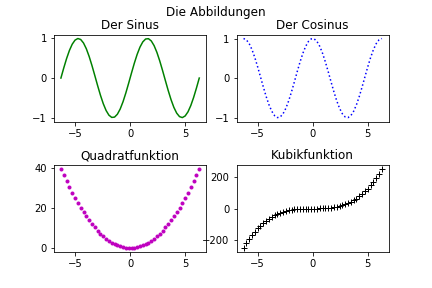

Die Matrix mit den Werten, um diese Abbildung zu erzeugen, erhalten wir durch den Aufruf der Funktion `initMatrix1()`.

## 1 Erzeugung der Abbildung

Wir erzeugen die Abbildung wie folgt unter Verwendung von bekanntem Code:

In [ ]:
%matplotlib inline

m=initMatrix1()
f=plt.figure()
    
f.suptitle("Die Abbildungen")
    
plt.subplot(221) # Nummerierung so
plt.plot(m[:,0],m[:,1],'-g')
plt.title('Der Sinus')
    
plt.subplot(2,2,2) # oder so
plt.plot(m[:,0],m[:,2],':b')
plt.title('Der Cosinus')
    
plt.subplot(223)
plt.plot(m[:,0],m[:,3],'.m')
plt.title('Quadratfunktion')
    
plt.subplot(224)
plt.plot(m[:,0],m[:,4],'+k')
plt.title('Kubikfunktion')
    
plt.subplots_adjust(hspace=.5) # Abstand zwischen der ersten und zweiten Zeile der subplots

## 2 Verwendung einer `for` Schleife

Nun lassen wir die verschiedenen Stile und Plotüberschriften weg und erzeugen eine minimalistische Version obiger Abbildung:

In [ ]:
%matplotlib inline
m=initMatrix1()

f=plt.figure()
f.suptitle("Die Abbildungen")

plt.subplot(221)
plt.plot(m[:,0],m[:,1])

plt.subplot(2,2,2)
plt.plot(m[:,0],m[:,2])

plt.subplot(223)
plt.plot(m[:,0],m[:,3])

plt.subplot(224)
plt.plot(m[:,0],m[:,4])

plt.subplots_adjust(hspace=.5)

Wenn wir den Code genauer betrachten, können wir eine Codeduplikation erkennen:

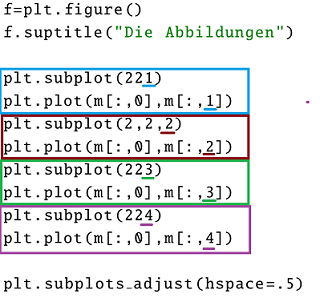

Nun können wir eine `for` Schleife verwenden, um obige minimalistische Abbildung zu erzeugen:

In [ ]:
%matplotlib inline
m=initMatrix1()

f=plt.figure()
f.suptitle("Die Abbildungen")
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.plot(m[:,0],m[:,i])
plt.subplots_adjust(hspace=.5)

## 3 Verwendung von Listen zur Anpassung der Subplots

Die einzelnen Subplots können einfach mit einer `for` Schleife erzeugt werden. Eine `for` Schleife ermöglicht es auch, Werte einer Liste nacheinander zu besuchen. Wir können die einzelnen Subplots also anpassen, indem wir den Stil sowie den Titel des Subplots in Listen schreiben:

In [ ]:
%matplotlib inline
m=initMatrix1()

titel=['Der Sinus','Der Cosinus', 'Quadratfunktion', 'Kubikfunktion']
stile=['-g',':b','.m','+k']
    
f=plt.figure()
f.suptitle('Die Abbildungen')
    
for i in range(1,5):
    plt.subplot(2,2,i)
    # die Nummer der Subplots beginnt bei 1 (i)
    # der Index in Listen bei 0 (index)
    # also muss index zu i-1 gesetzt werden
    index=i-1
    plt.plot(m[:,0],m[:,i],stile[index])
    plt.title(titel[index])
plt.subplots_adjust(hspace=.5)

## 4 Die Funktion (v.1)

Wenn wir obigen Code analysieren, können wir feststellen:
- die **Matrix** hat 5 Spalten. In der ersten Spalte sind die $x$-Werte, in den anderen Spalten die $y$-Werte, die in den einzelnen Abbildungen geplottet werden sollen.
- die Abbildung hat eine **Überschrift**.
- jeder einzelne Subplot hat einen **Titel**.
- jeder einzelne Subplot hat einen **Stil**.

Wir erzeugen nun also eine Funktion mit **vier Parametern**:
- der Matrix der Werte (`numpy` Array)
- dem Titel der Abbilfdung (`str`)
- den Titeln der Subplots (`list` von `str`)
- den Subtitlen der Subplots (`list` von `str`)

Unsere Funktion sieht also folgendermaßen aus:

In [ ]:
def erzeugePlot(m,abbTitel,subplotTitel,stile):
    f=plt.figure()
    f.suptitle(abbTitel)
    
    for i in range(1,5):
        plt.subplot(2,2,i)
        index=i-1
        plt.plot(m[:,0],m[:,i],stile[index])
        plt.title(subplotTitel[index])
    plt.subplots_adjust(hspace=.5)

und wir können sie dann wie folgt aufrufen:

In [ ]:
%matplotlib inline
m=initMatrix1()

titel=['Der Sinus','Der Cosinus', 'Quadratfunktion', 'Kubikfunktion']
stile=['-g',':b','.m','+k']

erzeugePlot(m,'Die Abbildungen',titel,stile)

**Aufgabe:**

1. Erzeugen Sie ein `numpy` Array, das Werte zwischen 1 und 5, deren Wurzel, den Logarithmus, das Quadrat und den Sinus als Spalten enthält. (Sie können sich am Code der Funktion [`initMatrix1()`](#fktInitMatrix) orientieren.

2. Rufen Sie obige Funktion `erzeugePlot()` auf, um eine Abbildung zu erzeugen. Verwenden Sie geeignete Überschriften und Titel.

In [ ]:
%matplotlib inline
# Ihre Loesung


## 5 Die Funktion (v.2)

In obiger Funktion werden der Reihe nach Plots mit der 2. bis 5. Spalte erzeugt. Wir können natürlich durch eine weitere Liste die Reihenfolge der Spalten in der Abbildung variieren. Es bietet sich an, diesen Parameter defaultmässig auf die Werte `[1,2,3,4]` zu setzen:

In [ ]:
def erzeugePlotv2(m,abbTitel,subplotTitel,stile, spaltenindex=[1,2,3,4]):
    f=plt.figure()
    f.suptitle(abbTitel)
    
    for i in range(1,5):
        plt.subplot(2,2,i)
        index=i-1
        plt.plot(m[:,0],m[:,spaltenindex[index]],stile[index])
        plt.title(subplotTitel[index])
    plt.subplots_adjust(hspace=.5)

Verwendung der Funktion mit Defaultwerten:

In [ ]:
%matplotlib inline
m=initMatrix1()

titel=['Der Sinus','Der Cosinus', 'Quadratfunktion', 'Kubikfunktion']
stile=['-g',':b','.m','+k']

erzeugePlotv2(m,'Die Abbildungen',titel,stile)

Verwendung der Funktion mit geänderter Reihenfolge der Spalten:

In [ ]:
%matplotlib inline
m=initMatrix1()

spalten=[2,4,3,1]
titel=['Der Cosinus', 'Kubikfunktion', 'Quadratfunktion','Der Sinus']
stile=['-g',':b','.m','+k']

erzeugePlotv2(m,'Die Abbildungen',titel,stile, spalten)

**Aufgabe:**

Verwenden Sie die Funktion `erzeugePlotv2()` um folgende Abbildung zu erzeugen:

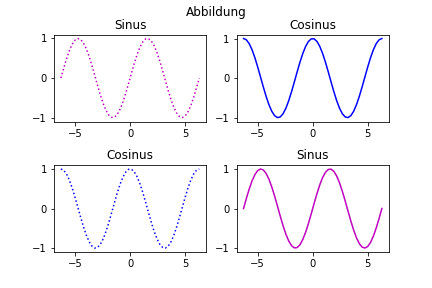

In [ ]:
%matplotlib inline
m=initMatrix1()

# Ihre Loesung

## 6 Die Funktion (v.3)

Wir verallgemeinern jetzt unsere Funktion und ermöglichen, dass nur einige der Subplots erzeugt werden (wir gehen immer noch von einer Abbildung von 2 mal 2 Subplots aus). 

Wir übergeben jetzt die folgenden Parameter:
- `daten`: das `numpy` Array mit den Werten
- `plotNr`: eine Liste der Subplotnummern
- `colNr`: eine Liste der Spaltennummern, die geplottet werden sollen. Die erste Spalte (Index 0) wird immer als $x$ Wert genommen
- `titel`: der Titel der Abbildung
- `subtitel`: eine Liste der Subtitel der einzelnen Plots
- `stile`: eine Liste der Stile der einzelnen Plots

Alle Listen müssen gleich lang sein. Die Funktion verzichtet darauf, dies zu überprüfen. Gegebenenfalls würden Fehler auftreten.

In [ ]:
def abbErzeugen(daten,plotNr,colNr,titel,subtitel,stile):  
    f=plt.figure()
    f.suptitle(titel)
    
    for i in range(len(plotNr)):
        plt.subplot(2,2,plotNr[i])
        plt.plot(daten[:,0],daten[:,colNr[i]],stile[i])
        plt.title(subtitel[i])
    plt.subplots_adjust(hspace=.5)

Wir erzeugen unsere Abbildung dann wie folgt:

In [ ]:
%matplotlib inline
m=initMatrix1()

titel=['Der Sinus','Der Cosinus', 'Quadratfunktion', 'Kubikfunktion']
stile=['-g',':b','.m','+k']

abbErzeugen(m,[1,2,3,4],[1,2,3,4],"Die Abbildungen", titel, stile)

**Aufgabe:**

Verwenden Sie die Funktion `abbErzeugen()` und erzeugen Sie folgende Abbildung: 

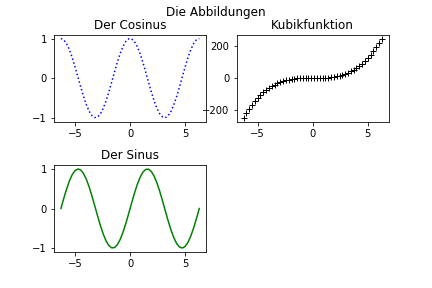

In [ ]:
%matplotlib inline
m=initMatrix1()

# Ihre Loesung

*Ende des Notebooks*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Dieses Notebook wurde von Christina B. Class für die Lehre an der EAH Jena erstellt. Es ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.
